In [291]:
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline
import statsmodels
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

In [292]:
min_interval_size = 100 # The smallest interval considered. If length of the interval is  <= 100, it is not splitted further
max_iter = 50000 # Maximum number of iterations for splitting


## Function to split to multiple intervals and compute ratio of eigen values

In [293]:
def process_time_series_all(s, min_eig_value):
    interval = (0, len(s))
    results = []
    splits_to_process = []
    num_iter = 0
    
    num_splits = 0
    
    eig_ratio = split_series(s[interval[0]:interval[1]])
    print("eig_ratio", eig_ratio)
#     if eig_ratio > min_eig_value:
#         results.append((eig_ratio, interval))
        
    if interval[1] - interval[0] > min_interval_size:
        mid = (interval[1] + interval[0]) // 2
        if eig_ratio < min_eig_value:
            print("Splitting further")
            splits_to_process.append([interval[0], mid])
            splits_to_process.append([mid, interval[1]])
            num_splits += 1
    eig_ratio = split_series(s[interval[0]:interval[1]])
    
    while len(splits_to_process)  > 0 and num_iter < max_iter:
        interval =  splits_to_process.pop()
        eig_ratio = split_series(s[interval[0]:interval[1]])
#        if eig_ratio > min_eig_value:
        results.append((eig_ratio, interval))
        if interval[1] - interval[0] > min_interval_size:
            mid = (interval[1] + interval[0]) // 2
            if eig_ratio < min_eig_value:
                splits_to_process.append([interval[0], mid])
                splits_to_process.append([mid, interval[1]])
                num_splits += 1
        num_iter = num_iter + 1
    
        
    return results, num_splits, num_iter
    


In [294]:
def split_series(series):
    #split into two, compute eigen value of each half, find the ratio of largest to smallest
    series = series - np.mean(series)
    # print("Mean of entire series", np.mean(series))
    if series.shape[0] % 2 == 0:
        # even
        series_1 = series[0:series.shape[0]//2]
        series_2 = series[series_1.shape[0]:]
    else:
        series_1 = series[0:series.shape[0]//2]
        series_2 = series[series_1.shape[0]:-1]
                    
    e1 = np.mean(series_1)
    e2 = np.mean(series_2)
    
    var1 = np.var(series_1)
    var2 = np.var(series_2)
    
    
  #  print("var1 converted to float",float(var1))
    zipped = []
    for i, j in zip(series_1, series_2):
        zipped.append([i,j])
    
    cov = np.cov(np.transpose(np.asarray(zipped)))
    e1,_ = np.linalg.eig(np.asarray(cov))
    
    eig_ratio = max(e1) / min(e1)
    return eig_ratio


In [295]:
def process_time_series(s, min_eig_value):
    interval = (0, len(s))
    results = []
    splits_to_process = []
    num_iter = 0
    
    eig_ratio = split_series(s[interval[0]:interval[1]])
    print("eig_ratio", eig_ratio)
    
    if eig_ratio > min_eig_value:
        results.append((eig_ratio, interval))
        
    if interval[1] - interval[0] > min_interval_size:
        mid = (interval[1] + interval[0]) // 2
        if eig_ratio < min_eig_value:
            splits_to_process.append([interval[0], mid])
            splits_to_process.append([mid, interval[1]])
    eig_ratio = split_series(s[interval[0]:interval[1]])
    while len(splits_to_process)  > 0 and num_iter < max_iter:
        #print("Inside the loop", eig_ratio, splits_to_process)
        interval =  splits_to_process.pop()
        eig_ratio = split_series(s[interval[0]:interval[1]])
        if eig_ratio > min_eig_value:
            results.append((eig_ratio, interval))
        if interval[1] - interval[0] > min_interval_size:
            mid = (interval[1] + interval[0]) // 2
            if eig_ratio < min_eig_value:
                splits_to_process.append([interval[0], mid])
                splits_to_process.append([mid, interval[1]])
        num_iter = num_iter + 1
    
#     if len(result) == 0:
        
        
    return results
    


In [296]:
def plot_eigen_ratio(data, results, max_value, fname, title, y_scale=None):
    result_step = np.zeros(max_value)
    for r in results:
        result_step[r[1][0]: r[1][1]] = r[0]
    plt.figure(figsize=(20, 10))
    
    
    plt.subplot(211)
    plt.plot(result_step)
    if y_scale is not None:
        plt.ylim(y_scale)
    
    plt.ylabel("Ratio of Eigen Value -Largest to Smallest")
    
    plt.title(title)
    plt.subplot(212)
    plt.plot(data)


    plt.savefig(fname)

In [297]:
def area_per_unit_length(results, max_value):
    result = 0
    for r in results:
        result += (r[1][1] - r[1][0]) * r[0]
    result /= max_value
    return result

## Function to compute min, max, variance are per unit lenght, number of plits

In [298]:
import statistics 
def print_results(data_name, results, max_value, num_splits):
    min_eig_ratio = min([r[0] for r in results])
    max_eig_ratio = max([r[0] for r in results])
    var_eig_ratio = statistics.variance([r[0] for r in results])
    area = area_per_unit_length(results, max_value)
    print(f"***********{data_name}***********")
    print("Minimum Eigen Ratio", min_eig_ratio)
    print("Maximum Eigen Ratio", max_eig_ratio)
    print("Variance of  Eigen", var_eig_ratio)
    print("Area of eig_ratio", area)
    print("Number of splits", num_splits)


# Lorenz
## Read data

In [299]:
with open("lorenz.dat","r") as fp:
    text= fp.readlines()
lorenz = [float(d) for d in text]
max_value_lorenz = len(lorenz)
print(f"Number of samples in lorenz {max_value_lorenz}")

Number of samples in lorenz 16384


## Plot intervals for which eigen_ratio > min_eigen_value

eig_ratio 1.3431781267931018
Splitting further


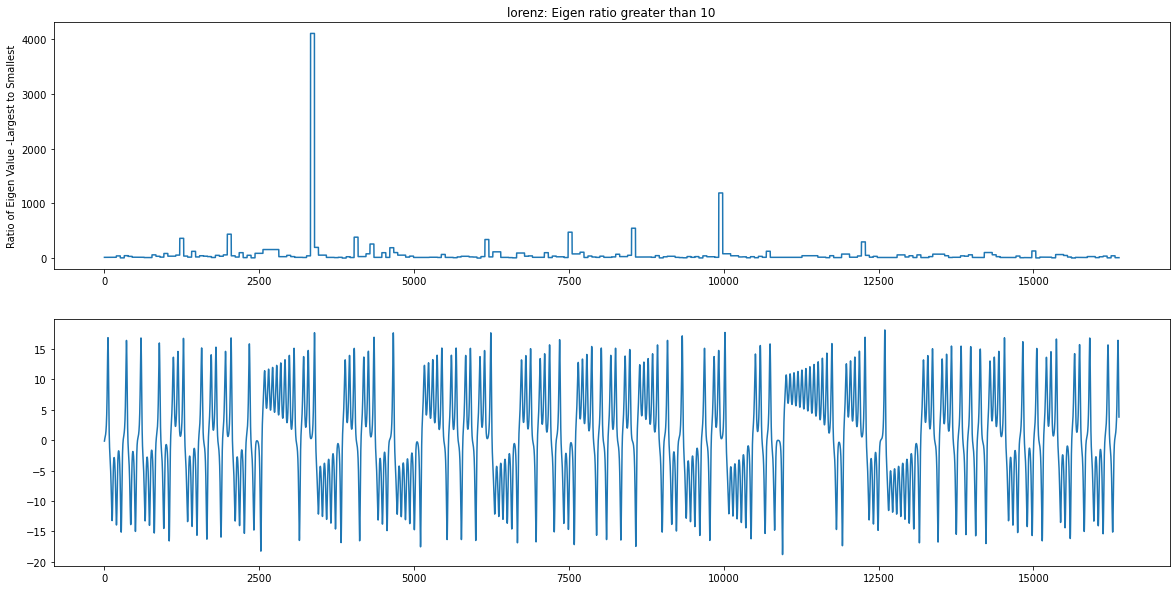

In [274]:
min_eigen_value = 10
results, num_splits, num_iters = process_time_series_all(np.asarray(lorenz), min_eigen_value)
plot_eigen_ratio(lorenz, results, max_value_lorenz, "lorenz_er.jpg", title=f"lorenz: Eigen ratio greater than {min_eigen_value}")

# plt.plot([r[0] for r in results])

In [275]:
print_results("Lorenz", results, max_value_lorenz, num_splits)

***********Lorenz***********
Minimum Eigen Ratio 1.0203797314931202
Maximum Eigen Ratio 4105.394964156313
Variance of  Eigen 50238.85231374322
Area of eig_ratio 81.19034407623317
Number of splits 193


# Auto correlation

C:\Users\Hari\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


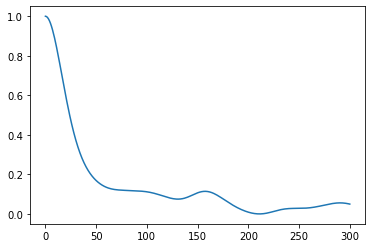

In [300]:
acm = sm.tsa.acf(lorenz, nlags=300)
# fig = tsaplots.plot_acf(lorenz, lags=300)
plt.plot(acm)

# Auto correlation Log scale

<ipython-input-301-181cb9c3e2c8>:2: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(acm))


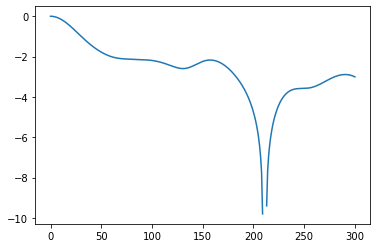

In [301]:
# fig = tsaplots.plot_acf(lorenz, lags=300)
plt.plot(np.log(acm))

## Power Spectrum

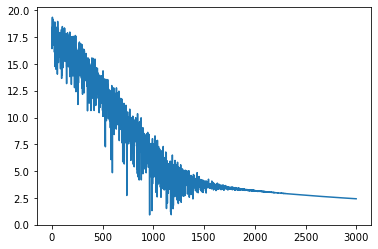

In [302]:
ps = np.abs(np.fft.fft(lorenz))**2
plt.plot(np.log(ps[0:3000]))

## Plot x Vs x + tau

C:\Users\Hari\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
<ipython-input-314-8b0240b403be>:4: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(acmlorenzlag))


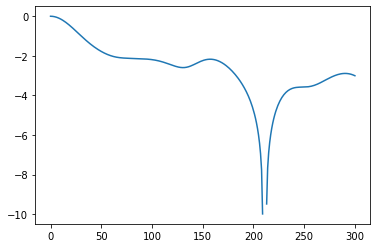

In [314]:
lorenzLag = lorenz[5:]
acmlorenzlag = sm.tsa.acf(lorenzLag, nlags=300)
# fig = tsaplots.plot_acf(lorenz, lags=300)
plt.plot(np.log(acmlorenzlag))
#plt.plot(acmlorenzlag)

In [279]:
tau = 20
num_samples_to_plot = 5000

In [280]:
lorenz = np.asarray(lorenz)

In [281]:
# PLot x(t) vs x(t+ tau)
shifted = lorenz[tau:]


Text(21.875, 0.5, 'X+20')

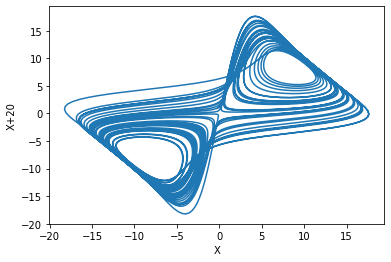

In [282]:
plt.plot(lorenz[0:num_samples_to_plot], shifted[0:num_samples_to_plot])
plt.savefig("x_vs_x_tau.jpg")
plt.xlabel("X")
plt.ylabel(f"X+{tau}")

## Create matrix with each row shifted by tau and factorize using SVD
M - Number of rows in matrix shifted_for_svd

tau - number of samples by which successive rows are shifted

In [283]:
def compute_svd(M, tau, max_num_samples_to_take, lorenz ):
    num_samples_to_take = min(lorenz.shape[0] - M * tau, max_num_samples_to_take)
    
    shifted_for_svd = []
    shifted_for_svd = np.zeros((M, num_samples_to_take))
    for i in range(M):
        shifted_for_svd[i] = lorenz[ i * tau:][0:num_samples_to_take]
    shifted_for_svd = np.asarray(shifted_for_svd)
#     print(shifted_for_svd.shape)
    
#     print(len(shifted_for_svd[0]))
    svd = np.linalg.svd(shifted_for_svd)
    return svd


# M = 2

In [284]:
M = 2
max_num_samples_to_take = 5000
svd = compute_svd(M, tau, max_num_samples_to_take, lorenz)
v_mat = svd[2]

## Plot 2nd largest eigen vector vs largest eigen vector

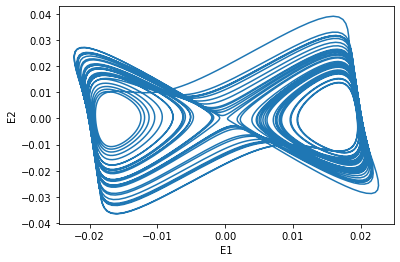

In [285]:
plt.plot(v_mat[0], v_mat[1])
plt.xlabel("E1")
plt.ylabel("E2")
plt.savefig("e1_vs_e2_m_2.jpg")

# M = 3

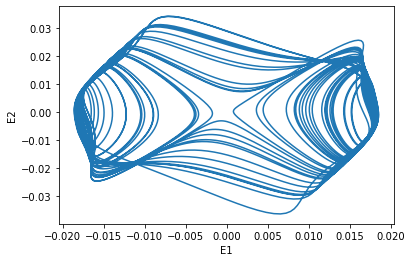

In [286]:
# SVD
M=3
max_num_samples_to_take = 5000

svd = compute_svd(M, tau, max_num_samples_to_take, lorenz)
v_mat = svd[2]


plt.plot(v_mat[0], v_mat[1])
plt.xlabel("E1")
plt.ylabel("E2")
plt.savefig("e1_vs_e2_m_3.jpg")


In [287]:
lorenz.shape

(16384,)

# M = 70

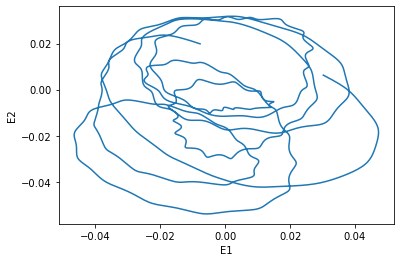

In [288]:
# SVD
M=70
num_samples_to_take = 2000

svd = compute_svd(M, tau, num_samples_to_take, lorenz)
v_mat = svd[2]

plt.plot(v_mat[0], v_mat[1])
plt.xlabel("E1")
plt.ylabel("E2")
plt.savefig("e1_vs_e2_m_4.jpg")

In [289]:
#M_array = np.arange(10, 100, 10)
#tau_array = np.arange(20, 200, 20)

#M_array = [2]
#tau_array = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120]
#tau_array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120]

M_array = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20]
tau_array = [80]

print("M", M_array)
print("tau", tau_array)


M [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20]
tau [80]


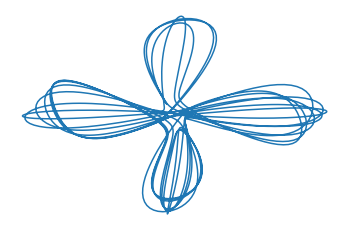

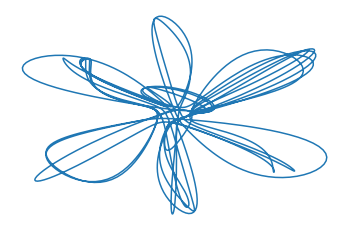

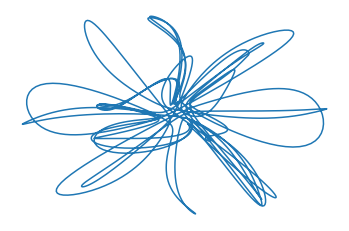

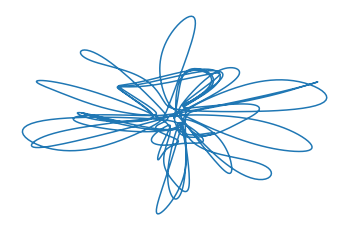

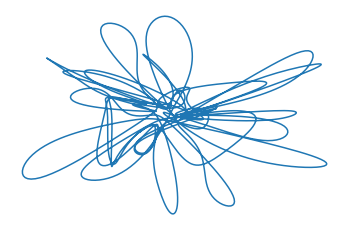

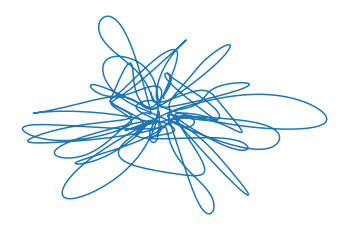

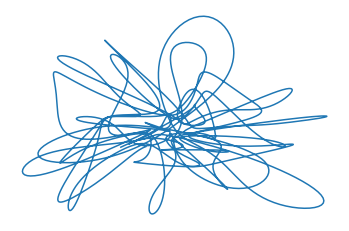

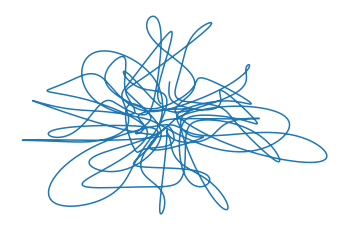

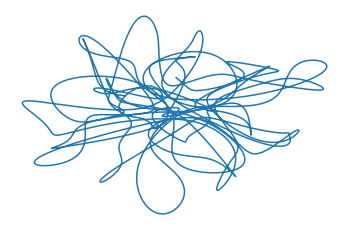

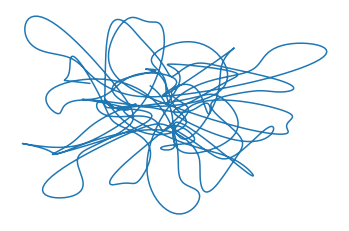

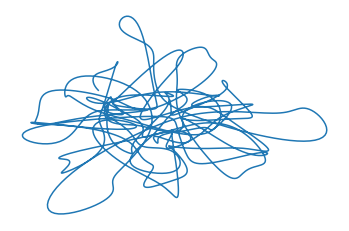

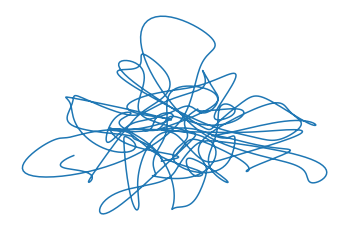

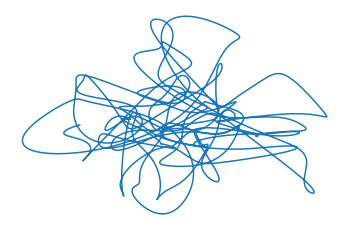

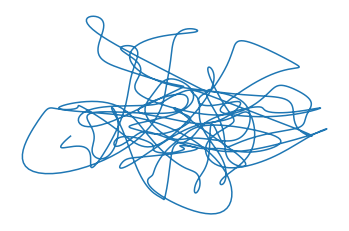

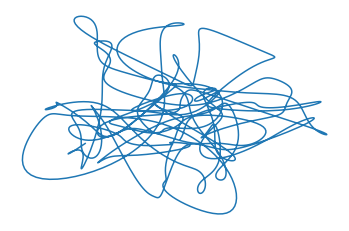

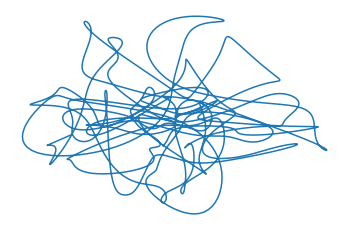

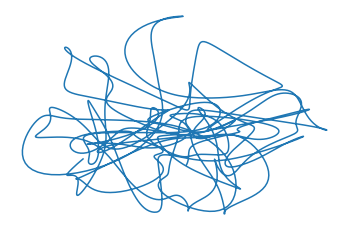

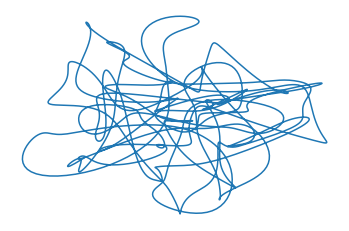

In [290]:
for M in M_array:
    for tau in tau_array:
        svd = compute_svd(M, tau, num_samples_to_take, lorenz)
        v_mat = svd[2]
        fig = plt.figure()
        plt.plot(v_mat[0][0:5000], v_mat[1][0:5000])
        plt.xlabel("E1")
        plt.ylabel("E2")
#        plt.title( f"M={M}  tau={tau}")
        plt.axis("off")
        plt.savefig(f"Results/Lorenz/Change_M_Fix_Tau/Lorenz_e1_vs_e2_{M}_{tau}.jpg")
